In [ ]:
import os
import path_file
os.chdir(os.path.dirname(os.path.dirname(path_file.__file__)))
os.getcwd()

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gasifier as g
import feedstock as fs
import cantera as ct

For species Fe(c), discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 4.2881898

For species Fe(c), discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 3.425820683333331

For species Fe(c), discontinuity in s/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 8.486560101557188

For species Cr(cr), discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  749.1520512400002
	Value computed using high-temperature polynomial: 0.0

For species Cr(cr), discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  113.24055562733336
	Value computed using high-temperature polynomial: 0.0

For species Cr(cr), discontinuity in s/R detec

In [11]:
# Figure 2 - RODRIGUES (2016)

fuelID = 'Average' # Average sawdust
T1 = 1000 # K
T2 = 1100 # K
moist = 0.15/(1-0.15) # kg/kg
P = 101325 # Pa (= 1 atm)
ER = np.linspace(0.0, 1.0, 20) # Razão de equivalência
species = ['C', 'N2','H2','CO','CH4','CO2','H2O']

fuel = fs.create_fuel_from_db(fuelID, 1.0, moist)

# stm = STEAM = vapor d'água

fractions1 = np.zeros((len(ER), len(species)))
fractions2 = np.zeros((len(ER), len(species)))

for i, ER_i in enumerate(ER):
    air = fs.create_air_from_ER(fuel, ER_i)
    outlet1 = g.gasify_isot(fuel, air, T=T1, P=P)
    outlet2 = g.gasify_isot(fuel, air, T=T2, P=P)
    for j, species_j in enumerate(species):
        fractions1[i, j] = outlet1.get_syngas_fraction(species_j)
        fractions2[i, j] = outlet2.get_syngas_fraction(species_j)

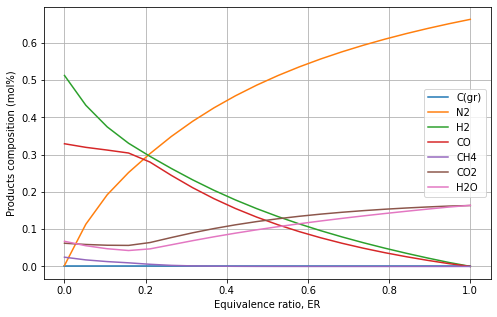

In [12]:
fig1 = plt.figure(figsize=(8,5))
plt.plot(ER, fractions1[:, 0], label='C(gr)')
plt.plot(ER, fractions1[:, 1], label='N2')
plt.plot(ER, fractions1[:, 2], label='H2')
plt.plot(ER, fractions1[:, 3], label='CO')
plt.plot(ER, fractions1[:, 4], label='CH4')
plt.plot(ER, fractions1[:, 5], label='CO2')
plt.plot(ER, fractions1[:, 6], label='H2O')
plt.legend()
plt.xlabel('Equivalence ratio, ER')
plt.ylabel('Products composition (mol%)')
plt.grid()
plt.show()

In [ ]:
# Figure 2 - RODRIGUES (2016) - Adiabactic calculations

fuel = 'Average' # Average sawdust
moist = 0.15/(1-0.15) # kg/kg
P = 101325 # Pa (= 1 atm)
ER = np.linspace(0.0, 1.0, 10)
species = ['C(gr)','N2','H2','CO','CH4','CO2','H2O']
T = np.zeros(len(ER))

fractions = np.zeros((len(ER), len(species)))

for i, ER_i in enumerate(ER):
    report = g.gasifier(fuel, fuelMass=1.0, moist=moist, P=P, 
                        air=ER_i, stm=0.0, airType='ER', stmType='SR', isot=False,
                        species=species)
    T[i] = report[0]['T']
    for j, species_j in enumerate(species):
        fractions[i, j] = report[0][species_j]

In [ ]:
fig2, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(ER, fractions[:, 0], label='C(gr)')
#ax1.plot(ER, fractions[:, 1], label='N2')
ax1.plot(ER, fractions[:, 2], label='H2')
ax1.plot(ER, fractions[:, 3], label='CO')
ax1.plot(ER, fractions[:, 4], label='CH4')
ax1.plot(ER, fractions[:, 5], label='CO2')
ax1.plot(ER, fractions[:, 6], label='H2O')
ax1.legend()
#ax1.set_xlabel('Equivalence ratio, ER')
ax1.set_ylabel('Products composition (mol%)')

ax2.plot(ER, T, label='T')
ax2.legend()
ax2.set_xlabel('Equivalence ratio, ER')
ax2.set_ylabel('Temperature (°C)')

plt.show()

In [ ]:
# Table 5 - RODRIGUES (2016)

fuelList = ['HighAshCoal', 'RiceHusk', 'Coconut', 'Pine1', 
            'Charcoal', 'Bagasse1', 'CaneStraw', 'CapimElefante0']

species = ['C(gr)','N2','H2','CO','CH4','CO2','H2O', 'H2S', 'NH3']

ER = 0.4
T = 1000 + 273.15
P = 101325 # Pa (= 1 atm)
moist = 0 # dry fuels

full = []
for i, f in enumerate(fuelList):
    d = g.gasifier(f, fuelMass=1.0, moist=moist, T=T, P=P, air=ER, 
                    stm=0.0, airType='ER', stmType='SR', isot=True,
                    species=species)
    d = d[0]
    full.append([d['FuelID'], round(d['H2']*100,3), round(d['CO']*100,3), round(d['CH4']*10**6,3), 
                round(d['CO2']*100,3), round(d['H2O']*100,3), round(d['H2S']*10**6,3), 
                round(d['NH3']*10**6,3),round(d['Y'],2), round(d['HHV'],2), round(d['CC'],1), round(d['CGE'],1)])

df = pd.DataFrame(full, columns=['Fuel', 'H2 (%)', 'CO (%)', 'CH4 (ppm)', 
                'CO2 (%)', 'H2O (%)', 'H2S (ppm)', 'NH3 (ppm)', 'Gas yield (Nm³/kg, db)',
                'HHV (MJ/kg, db)', 'CC (%)', 'CGE (%)'])
display(df)

In [ ]:
# Figure 6 - RODRIGUES (2016)

fuel1 = 'HighAshCoal'
fuel2 = 'Pine1'
ER = 0.4
T = 1000 + 273.15
P = 101325 # Pa (= 1 atm)
bld = np.linspace(0.0, 1.0, 10)

axis = []
for i, b in enumerate(bld):
    d = g.cogasifier(fuel1, fuel2, mass=1.0, blend=b, T=T, P=P, air=ER, species=species)
    axis.append([d['N2'], d['CO'], d['H2'], d['CH4']*10**5, d['CO2'], d['H2O'], d['C(gr)']*50])

fig = plt.figure(figsize=(8,5))
plt.plot(bld*100, [a[0] for a in axis], label='N₂')
plt.plot(bld*100, [a[1] for a in axis], label='CO')
plt.plot(bld*100, [a[2] for a in axis], label='H₂')
plt.plot(bld*100, [a[3] for a in axis], label='CH₄ × 10⁵')
plt.plot(bld*100, [a[4] for a in axis], label='CO₂')
plt.plot(bld*100, [a[5] for a in axis], label='H₂O')
plt.plot(bld*100, [a[6] for a in axis], label='C(s) × 50')
plt.legend()
plt.xlabel('Biomass ratio, BR (%wt)')
plt.ylabel('Products composition (mol%, wb)')
plt.grid()
plt.show()